# Dataset Analysis

In [2]:
import pandas as pd
import os
from handwriting_recognition.utils import get_dataset_folder_path

path_to_data = get_dataset_folder_path()
path_to_tr = os.path.join(path_to_data, 'pre_processed/train.csv')
path_to_ts = os.path.join(path_to_data, 'pre_processed/test.csv')
path_to_val = os.path.join(path_to_data, 'pre_processed/validation.csv')
print(path_to_tr)
print(path_to_ts)
print(path_to_val)

C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/train.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/test.csv
C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/validation.csv


In [8]:
tr = pd.read_csv(path_to_tr)
ts = pd.read_csv(path_to_ts)
val = pd.read_csv(path_to_val)
df = pd.concat([tr,val,ts])
df.head()

,file_name,label,file_path
0,TRAIN_00001.tiff,balthazar,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
1,TRAIN_00002.tiff,simon,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
2,TRAIN_00003.tiff,benes,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
3,TRAIN_00004.tiff,la love,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
4,TRAIN_00005.tiff,daphne,D:\Google Drive\Lifestyle\Interests\Coding\Pro...


In [11]:
all_names = ''.join(df['label']) # put all names into single string
all_names[0:100]

'balthazarsimonbenesla lovedaphnelucienassimassraouilavianmaevaemmamoulinierelisehonnertmatheopetitdi'

In [13]:
from collections import Counter
char_freq = Counter(all_names)
char_freq

Counter({'a': 336644,
         'e': 336253,
         'i': 217538,
         'n': 208946,
         'l': 201452,
         'r': 185396,
         'o': 170643,
         't': 124539,
         'u': 120402,
         's': 113986,
         'm': 102433,
         'c': 85183,
         'h': 77094,
         'd': 75551,
         'b': 57330,
         'g': 48970,
         'y': 36319,
         'p': 34707,
         'v': 31401,
         'f': 22859,
         'j': 19839,
         'z': 17736,
         'k': 17658,
         'x': 14194,
         ' ': 12949,
         '-': 8283,
         'w': 6902,
         'q': 6448,
         "'": 281,
         '`': 1})

In [22]:
sorted_char_freq = sorted(char_freq.items(), key=lambda item_tuple: item_tuple[1], reverse=False) # parse tuples and sort via the key, which is the count.
sorted_char_freq[0:5]

[('`', 1), ("'", 281), ('q', 6448), ('w', 6902), ('-', 8283)]

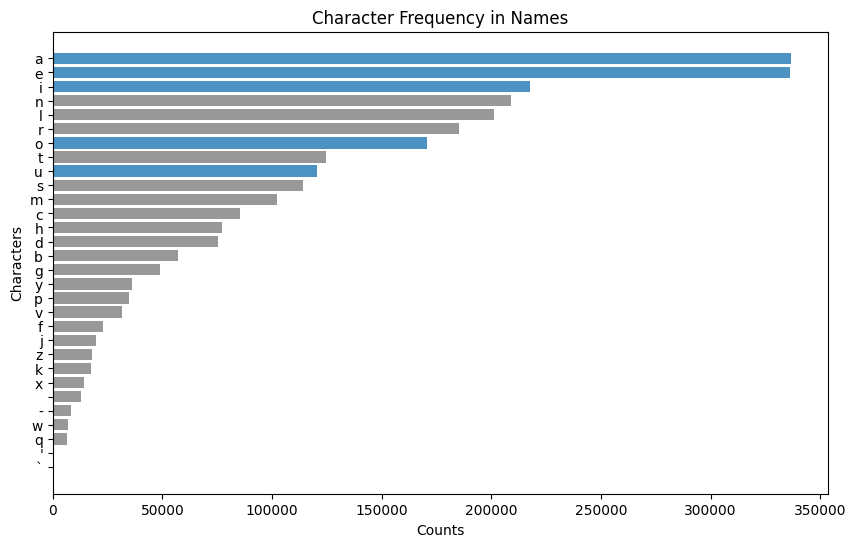

In [72]:
import matplotlib.pyplot as plt

sorted_char_freq = dict(sorted_char_freq) # formatted for plotting
characters = list(sorted_char_freq.keys())
character_counts = list(sorted_char_freq.values())

colours = ['C7'] * len(characters)

for vowel in 'aeiou':    
  highlighted_bar_index = characters.index(vowel) # The bar's index that we want to change colour.
  colours[highlighted_bar_index] = 'C0'

plt.figure(figsize=(10, 6))
# plt.barh(characters, character_counts, color='C0', alpha=0.8)
plt.barh(characters, character_counts, color=colours, alpha=0.8, )
plt.xlabel('Counts')
plt.ylabel('Characters')
plt.title('Character Frequency in Names')
plt.show()


# Find if there is a missing characters in the dataset

In [33]:
import string

all_possible_char = set(string.ascii_lowercase) # Note: punctuation could be added... or special accent characters.
uniq_char_in_all_names = set(all_names)
print(all_possible_char)
print(uniq_char_in_all_names)

{'b', 'c', 'j', 'x', 'p', 'h', 's', 'm', 'k', 'u', 'w', 'f', 'z', 'e', 'v', 'n', 'y', 'g', 'a', 'l', 'i', 'o', 't', 'q', 'r', 'd'}
{'`', 'b', 'c', 'j', ' ', 'x', 'p', 'h', '-', 's', 'm', 'k', 'u', 'w', 'f', 'z', 'e', 'v', 'n', 'y', "'", 'g', 't', 'l', 'a', 'i', 'o', 'q', 'r', 'd'}


In [35]:
# Do the difference between two sets
char_unrepresented = all_possible_char - uniq_char_in_all_names
print('Here is all the characters not represented in the dataset:', char_unrepresented)

Here is all the characters not represented in the dataset: set()


# Find what is the character length distribution of dataset

In [76]:
df['lengths'] = df['label'].apply(len)
sdf = df[['label','lengths']]
sdf.head()

,label,lengths
0,balthazar,9
1,simon,5
2,benes,5
3,la love,7
4,daphne,6


In [127]:
# longest names
sdf.sort_values(['lengths'],ascending=False)[0:5]

,label,lengths
38895,capucine capucine marie philippine,34
9431,dare de naissance classe,24
5187,date de naissance classe,24
36919,date of naissance classe,24
79681,angel michell ou indici,23


date of naissance classe is French for date of birth class

In [126]:
# shortist names
sdf.sort_values(['lengths'],ascending=False)[-6:-1]

,label,lengths
75675,a,1
8741,j,1
27825,h,1
210049,a,1
251860,t,1


In [85]:
sdf['lengths'].describe()

count    410638.000000
mean          6.555499
std           2.127457
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          34.000000
Name: lengths, dtype: float64

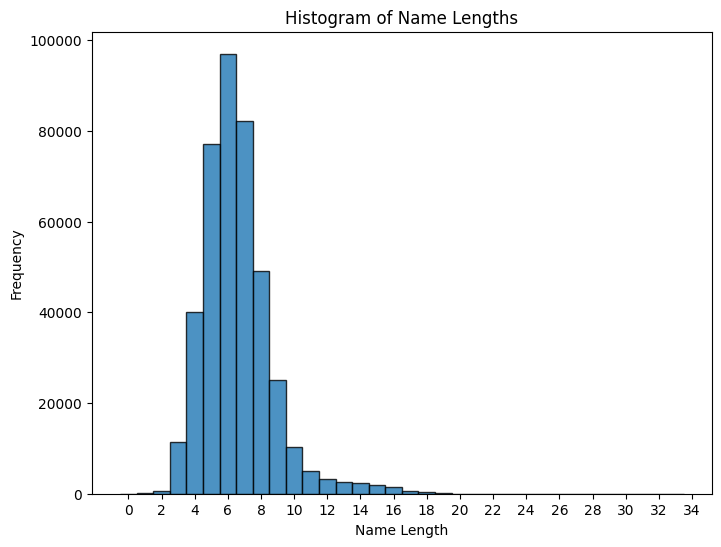

In [116]:
plt.figure(figsize=(8, 6))
plt.hist(sdf['lengths'], bins=range(0, max(sdf['lengths']) + 1), color='C0', edgecolor='black', alpha=0.8)
plt.xlabel('Name Length')
plt.xticks([x + 0.5 for x in range(max(sdf['lengths']) + 1) if x % 2 == 0], [x for x in range(max(sdf['lengths']) + 1) if x % 2 == 0])
plt.ylabel('Frequency')
plt.title('Histogram of Name Lengths')
# plt.grid(True)
plt.show()

# Find the most frequent names in the list

In [95]:
name_freq = sdf['label'].value_counts()
print(name_freq[0:5])
print(name_freq[-6:-1])

label
thomas     2271
lea        1986
emma       1870
lucas      1851
camille    1722
Name: count, dtype: int64
label
gaesaoui       1
att-meddour    1
kaisha         1
caiveau        1
debocq         1
Name: count, dtype: int64
